In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
air=pd.read_csv('AviationData.csv', encoding='ISO-8859-1')

In [3]:
air.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                  float64
Longitude                 float64
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.Damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.Flight          object
Air.Carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.Phase.of.Flight      object
Report.Status 

In [4]:
air

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20200102X82407,Accident,WPR20CA055,2019-12-31,"Elk, CA",United States,39.128611,-123.715833,LLR,Little River,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,TAKEOFF,Factual,13/01/2020
1,20191231X83852,Accident,CEN20FA049,2019-12-31,"OLATHE, KS",United States,38.846111,-94.736111,OJC,Johnson County Executive,...,Personal,NaN,2.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,08/01/2020
2,20200102X54844,Accident,ANC20CA011,2019-12-31,"Fairbanks, AK",United States,64.666945,-148.133334,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Preliminary,02/01/2020
3,20191230X91852,Accident,CEN20CA048,2019-12-30,"GRANBURY, TX",United States,32.365556,-97.645000,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Preliminary,31/12/2019
4,20191228X62945,NaN,WPR20CA053,2019-12-28,"Missoula, MT",United States,NaN,NaN,MSO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,03/01/2020
5,20191228X23853,Accident,CEN20MA044,2019-12-28,"LAFAYETTE, LA",United States,30.176111,-92.007500,LFT,Lafayette Regional Apt,...,Executive/Corporate,NaN,5.0,2.0,2.0,NaN,IMC,TAKEOFF,Preliminary,06/01/2020
6,20191225X93635,Accident,ERA20FA056,2019-12-25,"Headland, AL",United States,31.364167,-85.312500,0J6,Headland Municipal,...,NaN,"Viking Aviation, LLC (DBA: Survival Flight, LLC)",1.0,NaN,NaN,2.0,VMC,APPROACH,Preliminary,06/01/2020
7,20191230X95852,Accident,CEN20WA045,2019-12-24,"San Rafael, Mexico",Mexico,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRUISE,Foreign,NaN
8,20191223X92250,NaN,WPR20CA052,2019-12-23,"Chandler, AZ",United States,NaN,NaN,CHD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,03/01/2020
9,20191223X91929,Accident,WPR20CA056,2019-12-22,"Lake Havasu, AZ",United States,34.440000,-114.345555,NaN,NaN,...,Personal,NaN,NaN,1.0,NaN,1.0,VMC,NaN,Preliminary,06/01/2020


In [5]:
airfiltered=air[(air["Investigation.Type"]=="Accident")]

In [6]:
airfiltered

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20200102X82407,Accident,WPR20CA055,2019-12-31,"Elk, CA",United States,39.128611,-123.715833,LLR,Little River,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,TAKEOFF,Factual,13/01/2020
1,20191231X83852,Accident,CEN20FA049,2019-12-31,"OLATHE, KS",United States,38.846111,-94.736111,OJC,Johnson County Executive,...,Personal,NaN,2.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,08/01/2020
2,20200102X54844,Accident,ANC20CA011,2019-12-31,"Fairbanks, AK",United States,64.666945,-148.133334,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Preliminary,02/01/2020
3,20191230X91852,Accident,CEN20CA048,2019-12-30,"GRANBURY, TX",United States,32.365556,-97.645000,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Preliminary,31/12/2019
5,20191228X23853,Accident,CEN20MA044,2019-12-28,"LAFAYETTE, LA",United States,30.176111,-92.007500,LFT,Lafayette Regional Apt,...,Executive/Corporate,NaN,5.0,2.0,2.0,NaN,IMC,TAKEOFF,Preliminary,06/01/2020
6,20191225X93635,Accident,ERA20FA056,2019-12-25,"Headland, AL",United States,31.364167,-85.312500,0J6,Headland Municipal,...,NaN,"Viking Aviation, LLC (DBA: Survival Flight, LLC)",1.0,NaN,NaN,2.0,VMC,APPROACH,Preliminary,06/01/2020
7,20191230X95852,Accident,CEN20WA045,2019-12-24,"San Rafael, Mexico",Mexico,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRUISE,Foreign,NaN
9,20191223X91929,Accident,WPR20CA056,2019-12-22,"Lake Havasu, AZ",United States,34.440000,-114.345555,NaN,NaN,...,Personal,NaN,NaN,1.0,NaN,1.0,VMC,NaN,Preliminary,06/01/2020
10,20191221X83621,Accident,CEN20FA038,2019-12-21,"Evansville, IN",United States,38.095833,-87.540555,EVV,Evansville Rgnl,...,Personal,NaN,1.0,NaN,NaN,NaN,NaN,APPROACH,Preliminary,06/01/2020
11,20191223X54203,Accident,CEN20CA039,2019-12-20,"Delaware, OH",United States,NaN,NaN,DLZ,NaN,...,Instructional,NaN,NaN,NaN,1.0,NaN,NaN,NaN,Preliminary,06/01/2020


Here we will compare fatal injuries to  weather condition.

In [11]:
air2=pd.DataFrame(airfiltered[['Total.Fatal.Injuries','Weather.Condition']])
air2

,Total.Fatal.Injuries,Weather.Condition
0,NaN,VMC
1,2.0,VMC
2,NaN,NaN
3,NaN,NaN
5,5.0,IMC
6,1.0,VMC
7,NaN,NaN
9,NaN,VMC
10,1.0,NaN
11,NaN,NaN


In [22]:
air2=air2.dropna(how='any',axis=0)
air2.groupby("Weather.Condition").mean()

,Total.Fatal.Injuries
Weather.Condition,
IMC,2.369919
UNK,3.273058
VMC,0.514621


In [23]:
air2.groupby("Weather.Condition").std()

,Total.Fatal.Injuries
Weather.Condition,
IMC,10.312467
UNK,16.018351
VMC,3.271101


From the mean and standard deviation, we can assume that flying during VMC results in the lowest number of deaths. However, if we plot it on a graph,

In [13]:
jointDF2 = pd.concat([air2['Total.Fatal.Injuries'], air2['Weather.Condition'].reindex(index=air2['Total.Fatal.Injuries'].index)], sort = False, axis = 1)

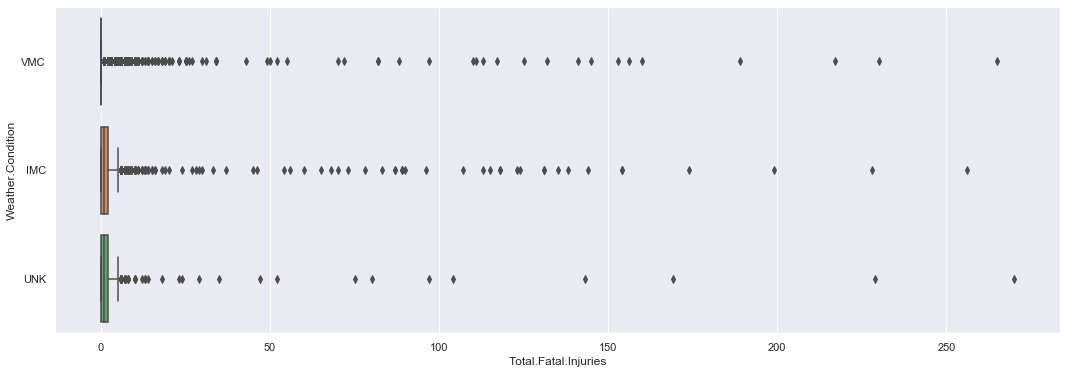

In [14]:
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x="Total.Fatal.Injuries", y="Weather.Condition",data = jointDF2, orient = "h")

A large spread of anomalies arise for all of the weather conditions. Further investigation using heatmap:

In [15]:
air2.count()

Total.Fatal.Injuries    54236
Weather.Condition       54236
dtype: int64

In [16]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(max_depth = 2)

In [17]:
tfi_train=pd.DataFrame((air2["Total.Fatal.Injuries"])[:40000])
tfi_test=pd.DataFrame((air2["Total.Fatal.Injuries"])[-14236:])
wc_train=pd.DataFrame((air2["Weather.Condition"])[:40000])
wc_test=pd.DataFrame((air2["Weather.Condition"])[-14236:])

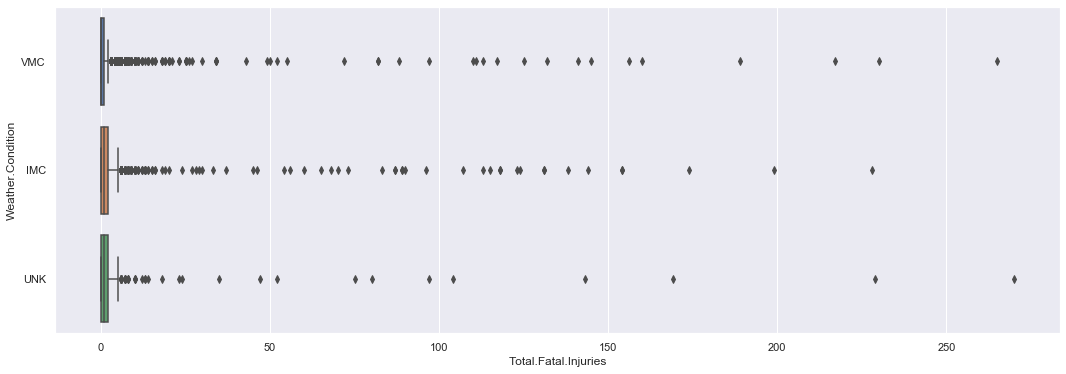

In [18]:
jointDF3 = pd.concat([tfi_train, wc_train.reindex(index=tfi_train.index)], sort = False, axis = 1)
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "Total.Fatal.Injuries", y = "Weather.Condition", data = jointDF3, orient = "h")

In [19]:
dectree.fit(tfi_train, wc_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Classification Accuracy 	: 0.8925


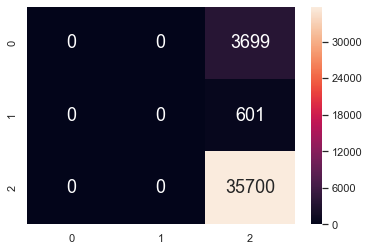

In [20]:
# Predict Legendary corresponding to Total Train
wc_train_pred = dectree.predict(tfi_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(tfi_train, wc_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(wc_train, wc_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Due to the large spread of anomalies, the heatmap incorrectly guesses that the weather condition of all the data is the same.
This comes about due to the spread of the data.
It should hence be noted that even though the weather condition affects the number of fatalities, many other factors also affect the number of fatalities.

Next, we will compare Broad.Phase.of.Flight against No.of.Fatal.Injuries.

In [24]:
air3=pd.DataFrame(airfiltered[['Total.Fatal.Injuries','Broad.Phase.of.Flight']])
air3

,Total.Fatal.Injuries,Broad.Phase.of.Flight
0,NaN,TAKEOFF
1,2.0,TAKEOFF
2,NaN,NaN
3,NaN,NaN
5,5.0,TAKEOFF
6,1.0,APPROACH
7,NaN,CRUISE
9,NaN,NaN
10,1.0,APPROACH
11,NaN,NaN


In [25]:
air3=air3.dropna(how='any',axis=0)

In [30]:
air3.groupby("Broad.Phase.of.Flight").mean()

,Total.Fatal.Injuries
Broad.Phase.of.Flight,
APPROACH,0.815176
CLIMB,1.146384
CRUISE,0.800612
DESCENT,0.783951
GO-AROUND,0.715702
LANDING,0.056050
MANEUVERING,0.845858
OTHER,1.035714
STANDING,0.287554


In [31]:
air3.groupby("Broad.Phase.of.Flight").std()

,Total.Fatal.Injuries
Broad.Phase.of.Flight,
APPROACH,4.282943
CLIMB,6.638504
CRUISE,3.437958
DESCENT,4.393857
GO-AROUND,2.603713
LANDING,0.502990
MANEUVERING,1.384676
OTHER,1.627071
STANDING,1.401596


In [27]:
jointDF3 = pd.concat([air3['Total.Fatal.Injuries'], air3['Broad.Phase.of.Flight'].reindex(index=air3['Total.Fatal.Injuries'].index)], sort = False, axis = 1)

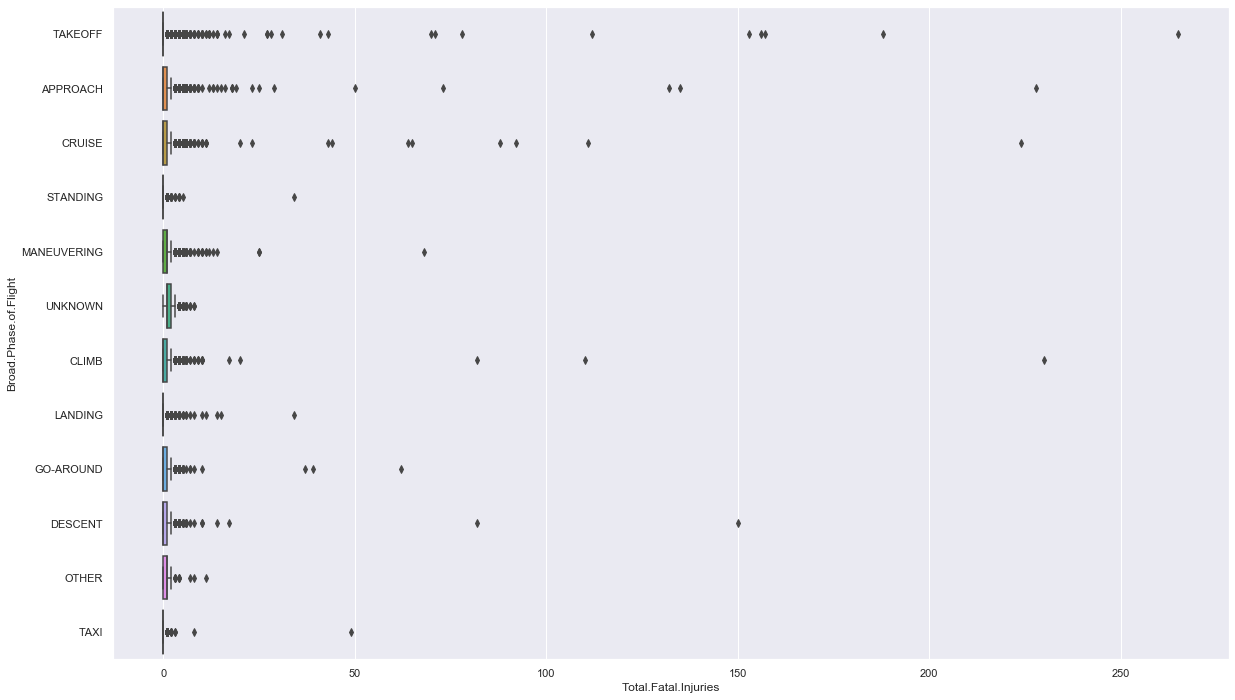

In [37]:
f, axes = plt.subplots(1, 1, figsize=(20, 12))
sb.boxplot(x="Total.Fatal.Injuries", y="Broad.Phase.of.Flight",data = jointDF3, orient = "h")

This implies the phase of flight has little impact on number of deaths.

AttributeError: 'DataFrame' object has no attribute 'words'